In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv"

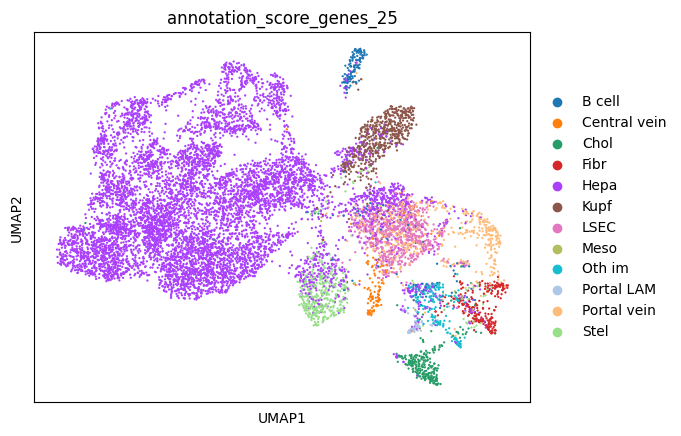

              annotation_score_genes_25
B cell                         1.807980
Central vein                   0.970787
Chol                           2.377984
Fibr                           2.048450
Hepa                          70.422159
Kupf                           5.049875
LSEC                           6.706448
Meso                           0.062344
Oth im                         1.585322
Portal LAM                     0.614535
Portal vein                    4.613466
Stel                           3.740648


In [5]:
# Original score_genes
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

Hepa            64.161026
LSEC            12.468828
Stel             6.243320
Kupf             4.934093
Fibr             2.333452
Chol             2.253295
Oth im           1.772355
Portal vein      1.692198
B cell           1.531885
Portal LAM       1.184539
Unknown          0.543285
Central vein     0.498753
Meso             0.382971
Name: annotation_own_score_genes, dtype: float64


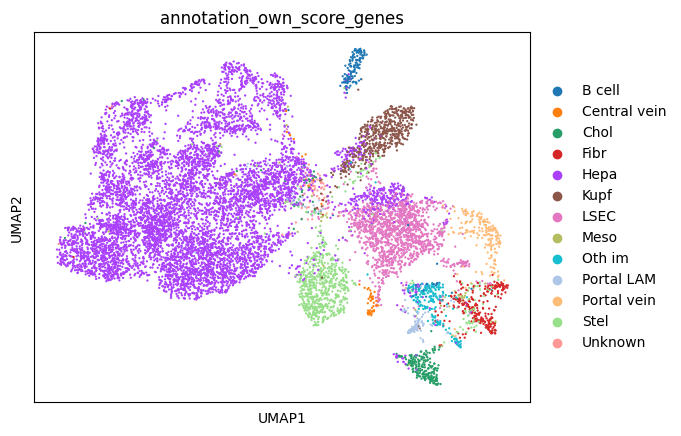

5.165657285358034


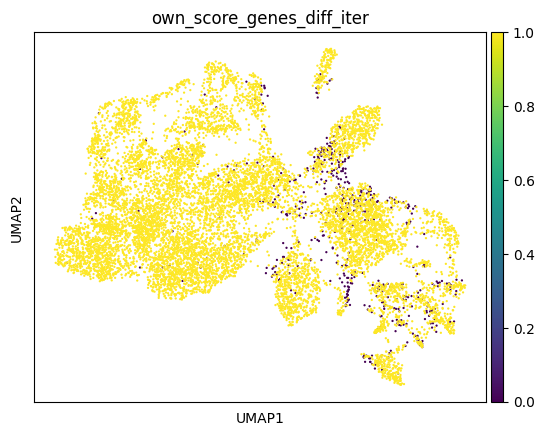

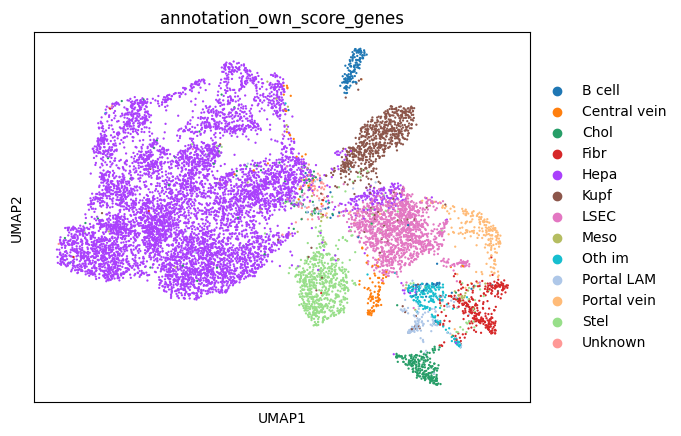

Hepa            0.617029
LSEC            0.119523
Kupf            0.063146
Stel            0.059672
Fibr            0.027699
Chol            0.026630
Portal vein     0.018436
B cell          0.017189
Oth im          0.016922
Portal LAM      0.014428
Central vein    0.009975
Unknown         0.005433
Meso            0.003919
Name: annotation_own_score_genes, dtype: float64
0.8550053437833987


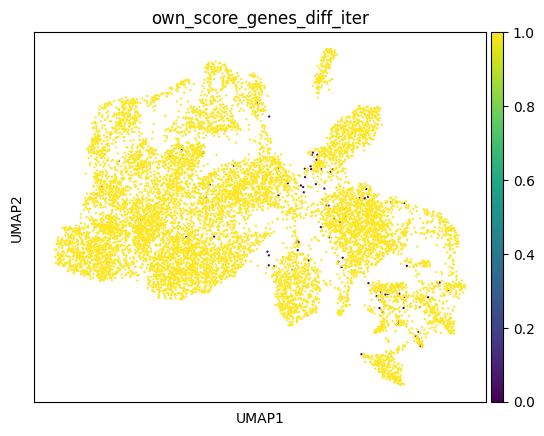

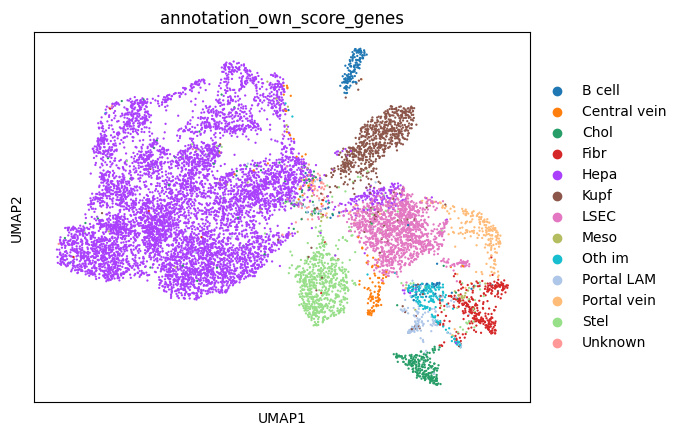

Hepa            0.613199
LSEC            0.118454
Kupf            0.065105
Stel            0.060652
Fibr            0.028589
Chol            0.026808
Portal vein     0.018881
B cell          0.017367
Oth im          0.015497
Portal LAM      0.015408
Central vein    0.010509
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
0.17812611328820804


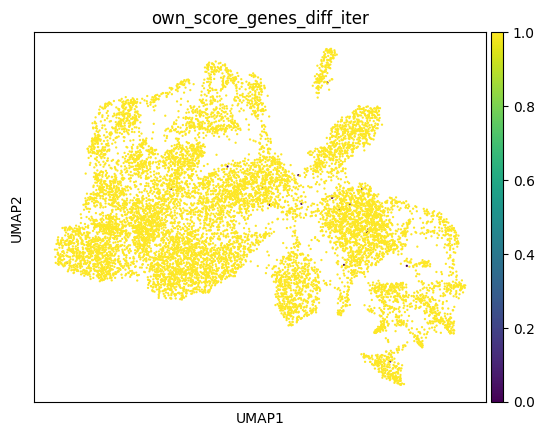

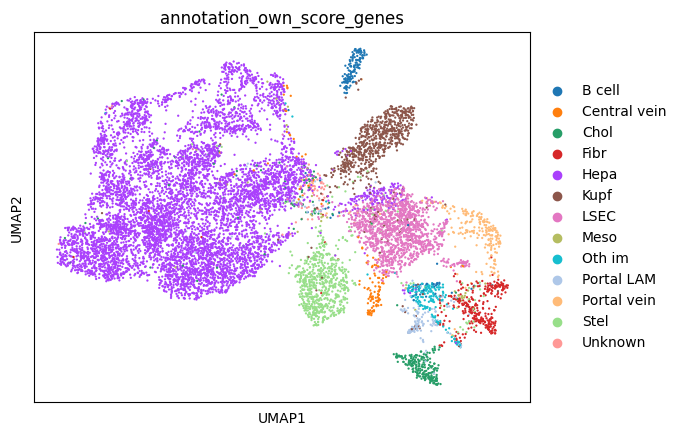

Hepa            0.612309
LSEC            0.118632
Kupf            0.065550
Stel            0.060741
Fibr            0.028589
Chol            0.026808
Portal vein     0.018970
B cell          0.017278
Portal LAM      0.015586
Oth im          0.015408
Central vein    0.010599
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
0.017812611328820803


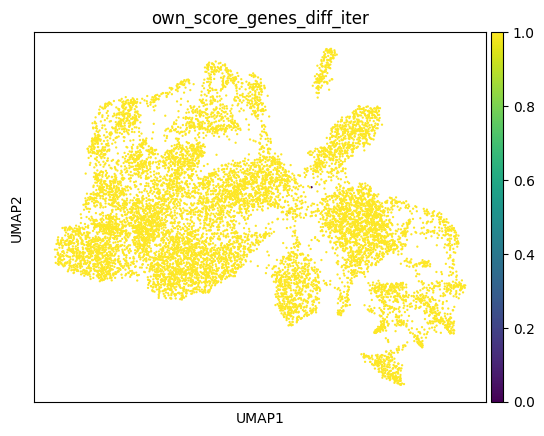

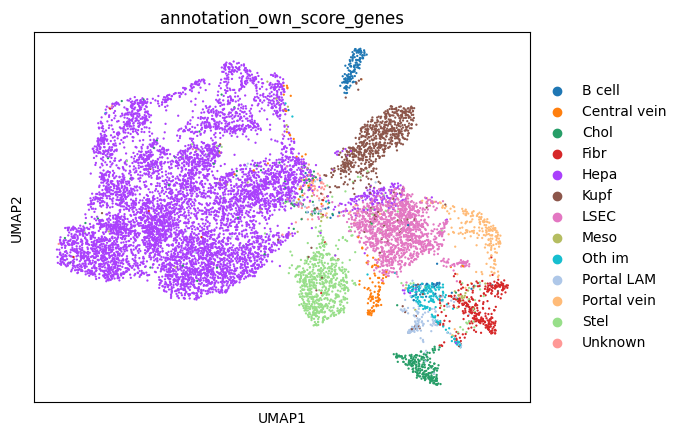

Hepa            0.612309
LSEC            0.118632
Kupf            0.065639
Stel            0.060563
Fibr            0.028589
Chol            0.026808
Portal vein     0.018970
B cell          0.017278
Portal LAM      0.015675
Oth im          0.015408
Central vein    0.010599
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
0.008906305664410401


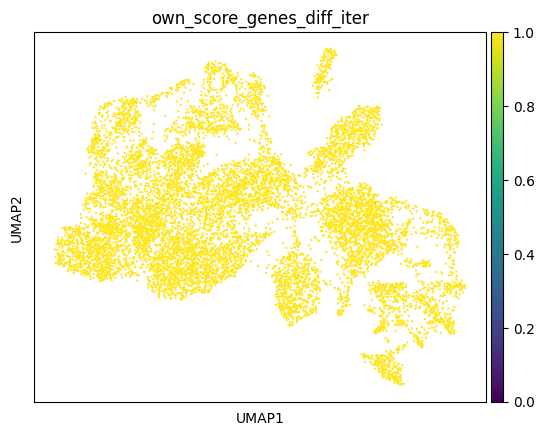

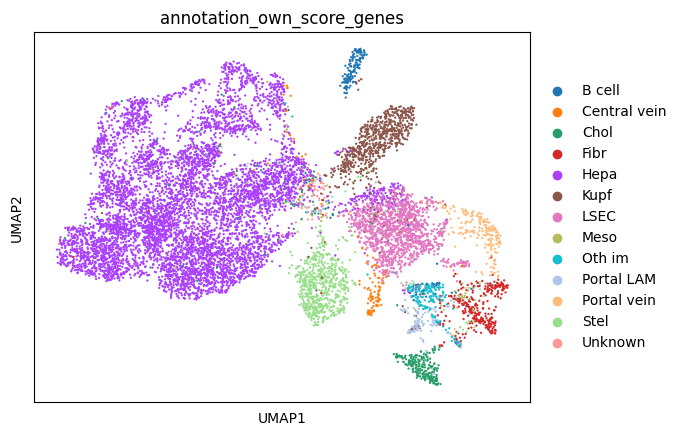

Hepa            0.612309
LSEC            0.118632
Kupf            0.065729
Stel            0.060474
Fibr            0.028589
Chol            0.026808
Portal vein     0.018970
B cell          0.017278
Portal LAM      0.015675
Oth im          0.015408
Central vein    0.010599
Unknown         0.005433
Meso            0.004097
Name: annotation_own_score_genes, dtype: float64
converged


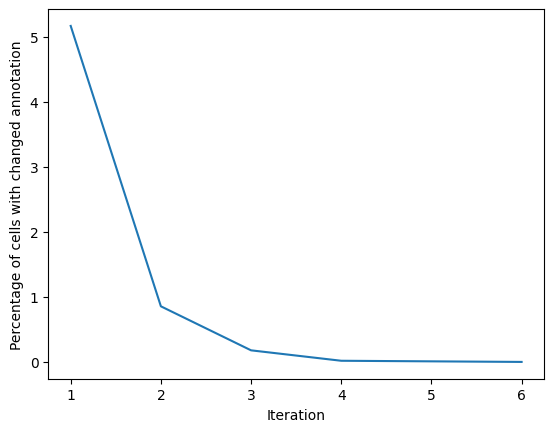

In [6]:
# Own score genes iterative
scores = own_score_genes_iterative(sdata.table,path_mg,nr_iterations=8,output_dir=OUTPUT_DIR)

Hepa             8.669
LSEC             9.333
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            16.001
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


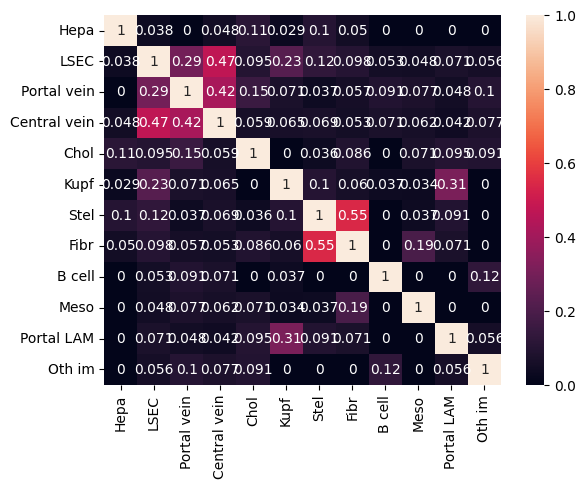

In [7]:
Jaccard_similarity_matrix(path_mg)

<AxesSubplot: >

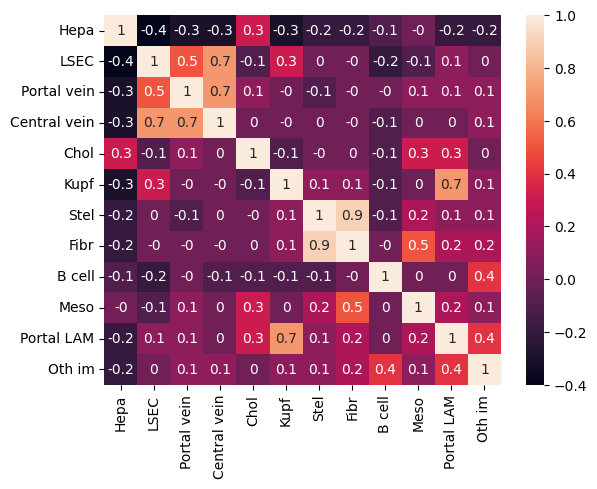

In [8]:
# plot correlation matrix of the features
sns.heatmap(np.round(scores.corr(method='pearson'),1), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

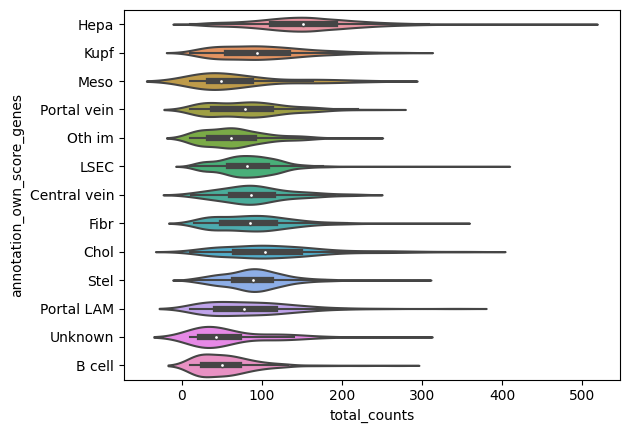

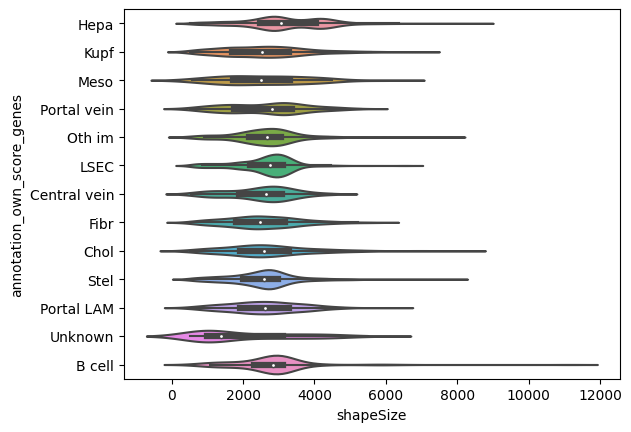

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

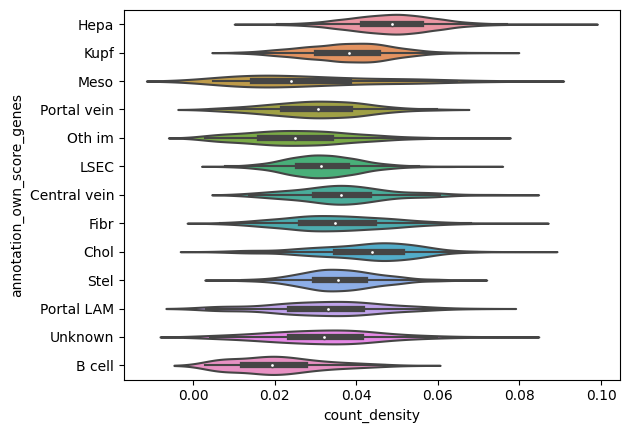

In [9]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

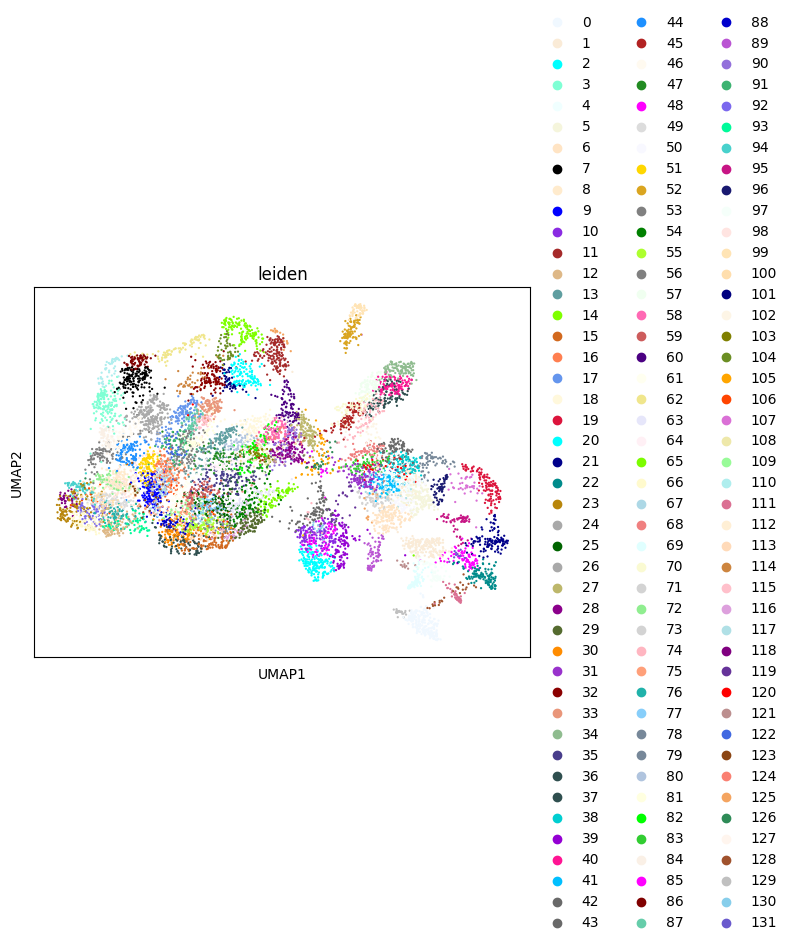

In [10]:
sc.tl.leiden(sdata.table,resolution=10,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Central vein', 'Chol', 'Fibr', 'Hepa', 'Kupf', 'LSEC',
       'Meso', 'Oth im', 'Portal LAM', 'Portal vein', 'Stel', 'Unknown'],
      dtype='object')
Hepa
[3, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 44, 46, 47, 49, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 90, 91, 92, 93, 94, 98, 100, 101, 103, 104, 106, 108, 109, 110, 113, 114, 115, 116, 118, 122, 123, 124, 127]
Kupf
[34, 37, 40, 45, 57, 70, 74, 102]
LSEC
[4, 5, 6, 31, 38, 41, 43, 50, 71, 78, 83, 95, 96, 112, 117, 120]
Central vein
[89]
Portal vein
[19, 107]
Fibr
[21, 22, 48, 128, 131]
Stel
[2, 10, 39, 42, 85, 119, 130]
Meso
[]
Chol
[0, 129]
B cell
[52, 99]
Oth im
[1, 97]
Unknown
[105, 111, 121, 125, 126]
Portal LAM
[69]


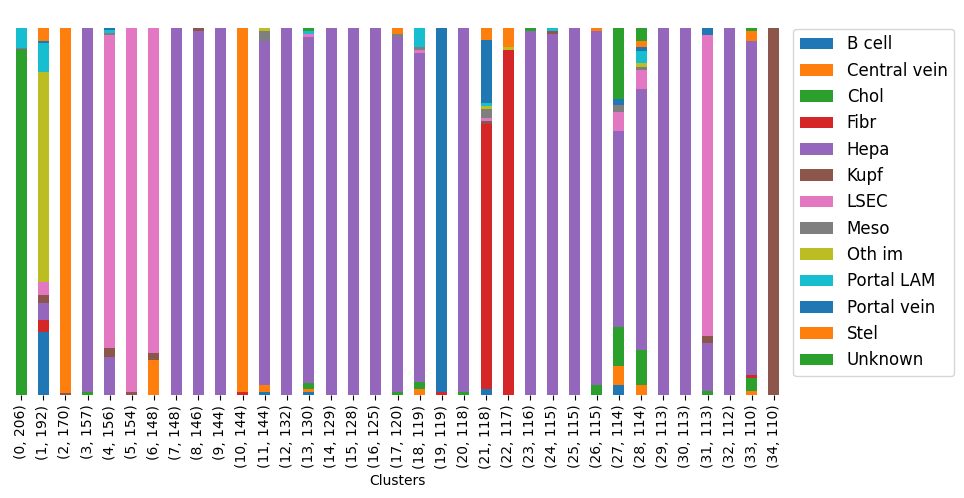

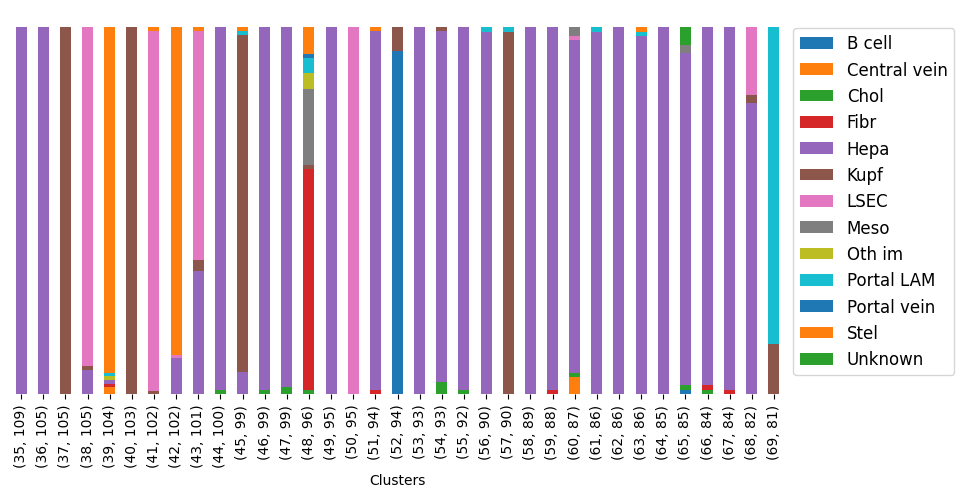

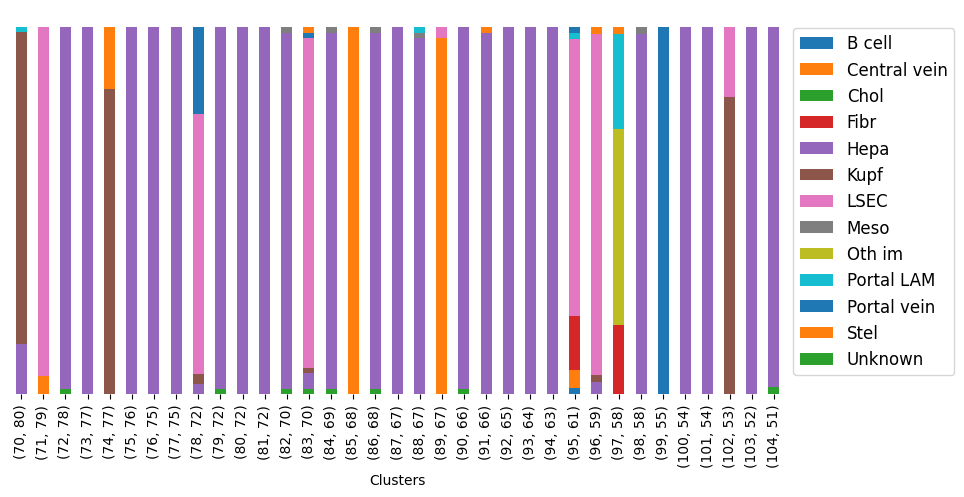

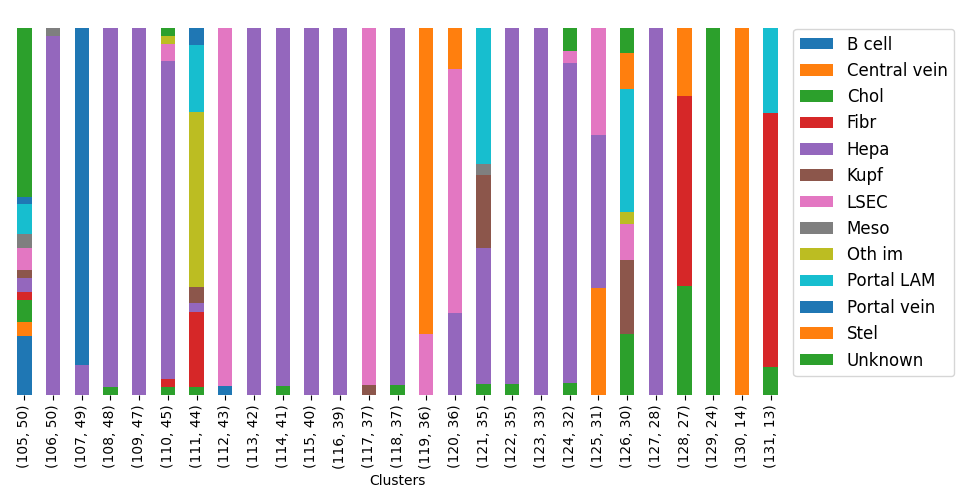

In [11]:
cell_types = ['Hepa','Kupf','LSEC','Central vein','Portal vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown','Portal LAM']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

In [12]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
print(sdata.table.obs['leiden_cell_types'].value_counts())


Hepa            6936
LSEC            1431
Kupf             717
Stel             638
Fibr             371
Oth im           250
Chol             230
Unknown          190
Portal vein      168
B cell           149
Portal LAM        81
Central vein      67
Name: leiden_cell_types, dtype: int64


67
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Axl', 'Fibr'], ['Des', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Pecam1', 'B cell'], ['C5ar1', 'Portal LAM'], ['Fcgr1', 'Portal LAM']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Sirpa', 'Portal LAM']]
Central vein
Maybe drop:[['Cd9', 'Portal vein']]
Portal vein
Maybe drop:[['Plpp1', 'Central vein']]
Oth im
Maybe drop:[['Cd9', 'Portal vein']]
Portal LAM
Maybe drop:[['Cd9', 'Portal vein'], ['Spp1', 'Chol']]
B cell
Maybe drop:[['Itgb7', 'Oth im']]
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Lpl', 'Fibr'], [

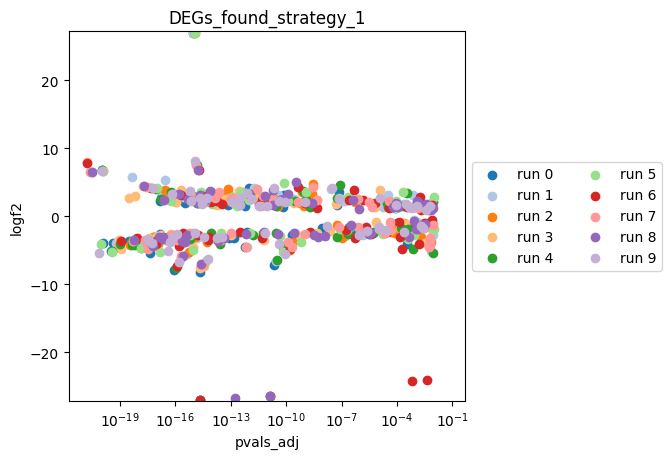

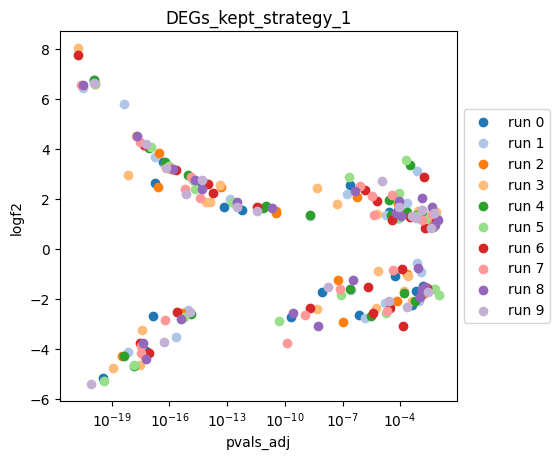

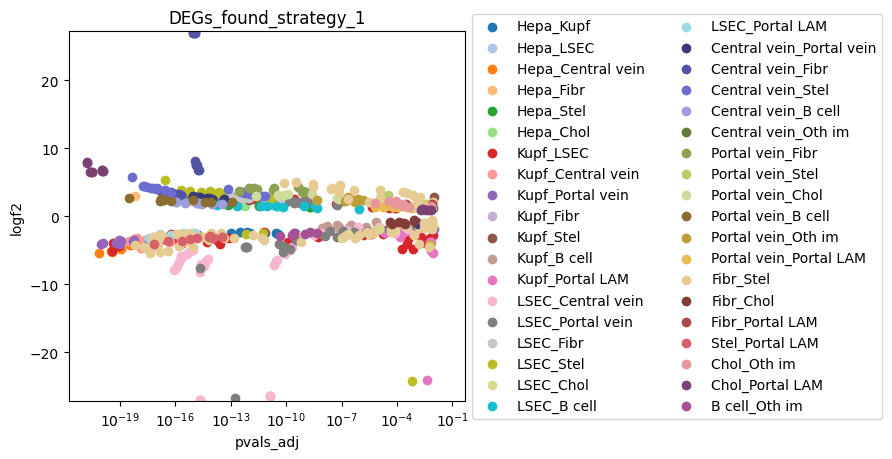

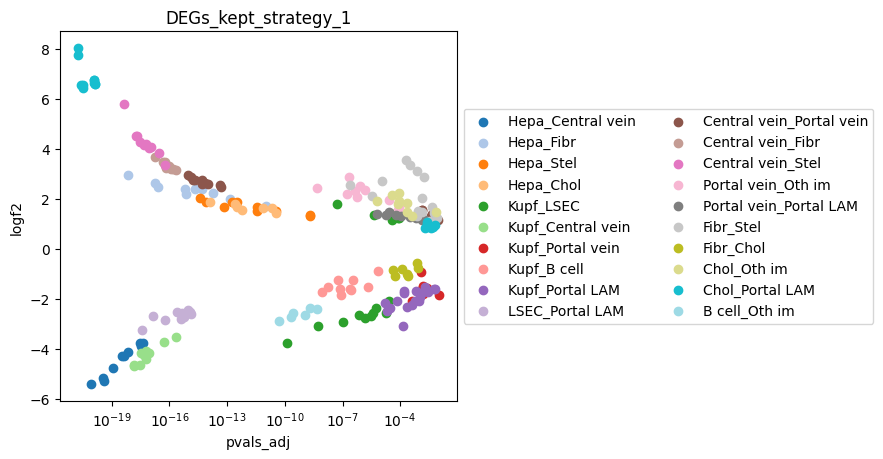

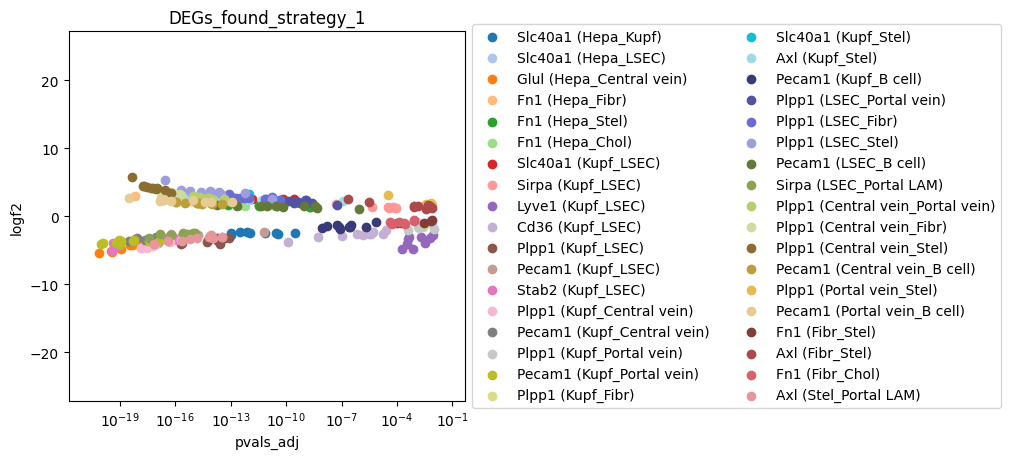

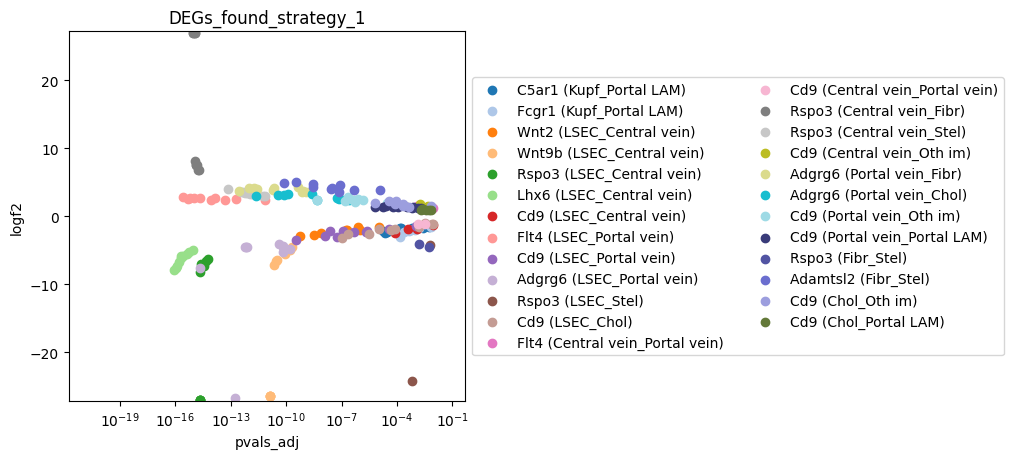

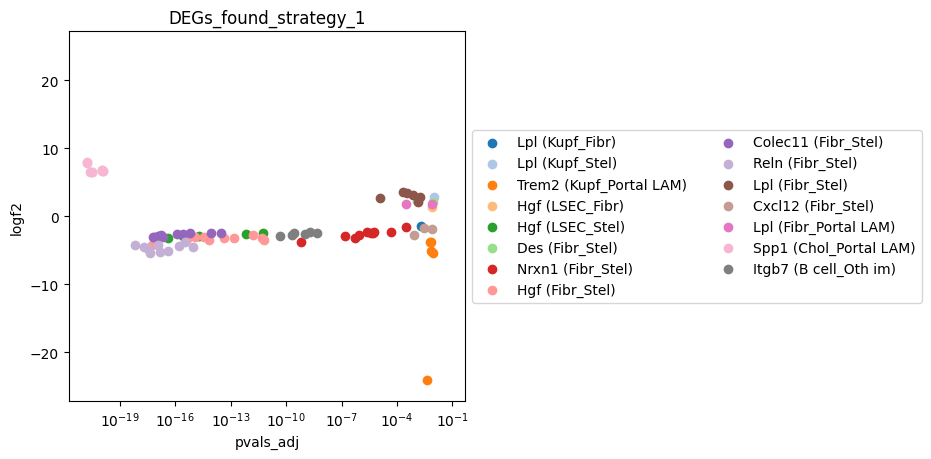

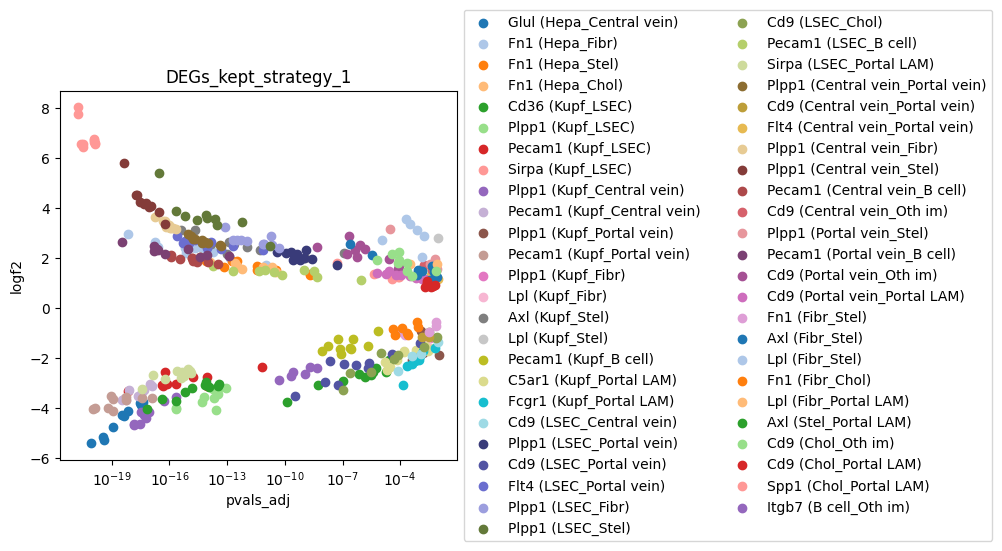

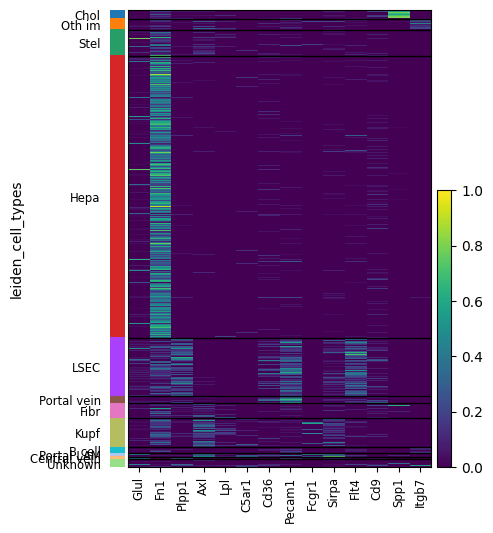

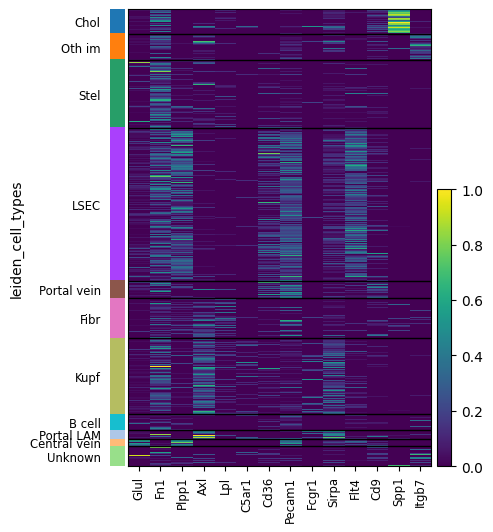

In [13]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,1,OUTPUT_DIR)

67
Ccr2
Is marker gene of: ['Portal LAM']
Could also be a marker gene of: ['Oth im']
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Portal vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Clec10a
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal LAM']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Kupf', 'Central vein', 'Stel']
Dpt
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal LAM']
F13a1
Is marker gene of: []
Could also be a marker gene of: ['Portal LAM']
Ghr
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Stel']
Itgax
Is marker gene of: ['Oth im']
Could also be a marker gene of: ['Portal LAM']
Lilra5
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Portal LAM']
Mgl2
Is marker gene of: []
Could al

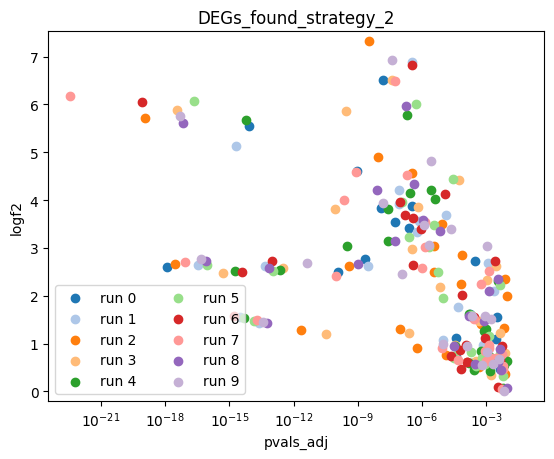

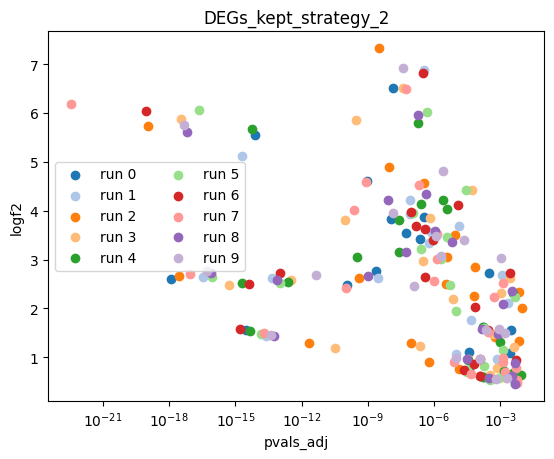

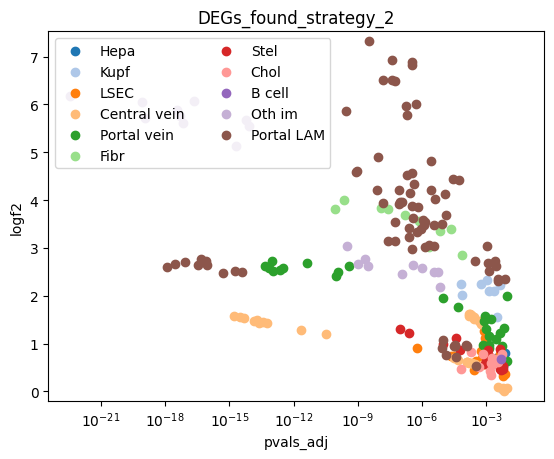

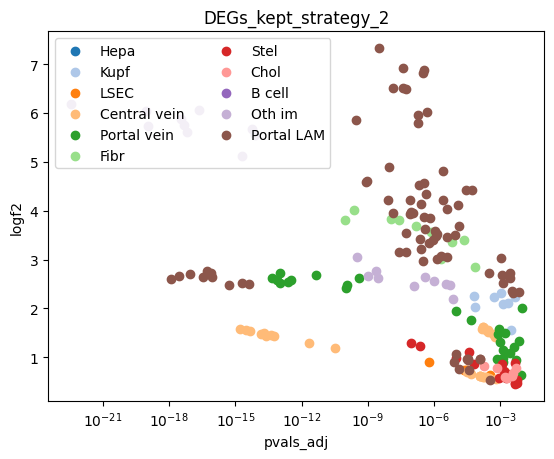

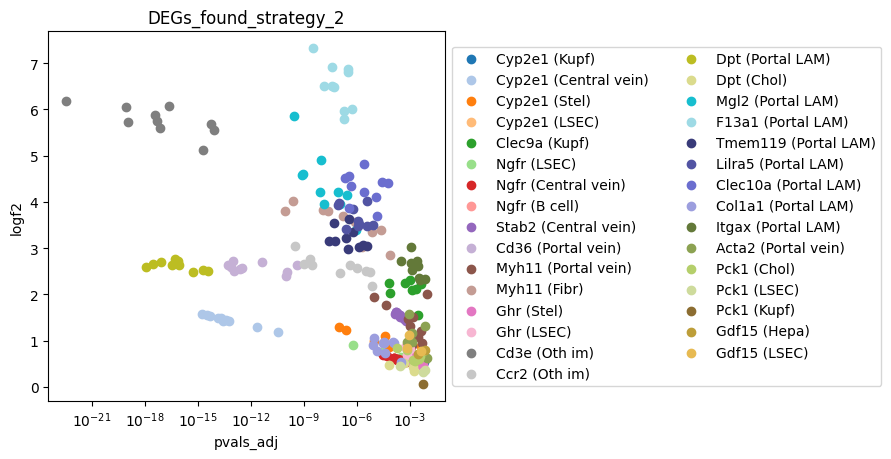

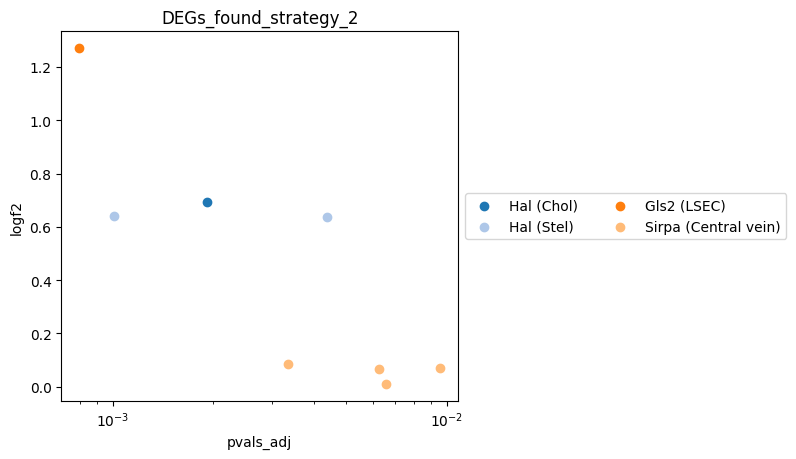

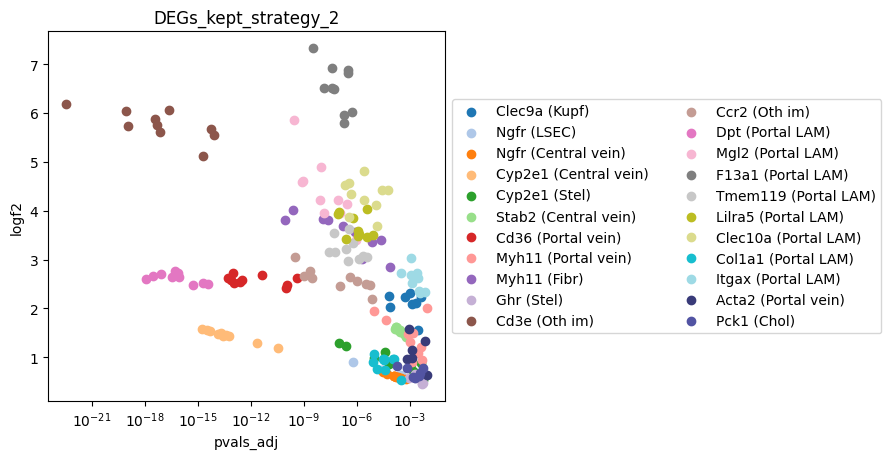

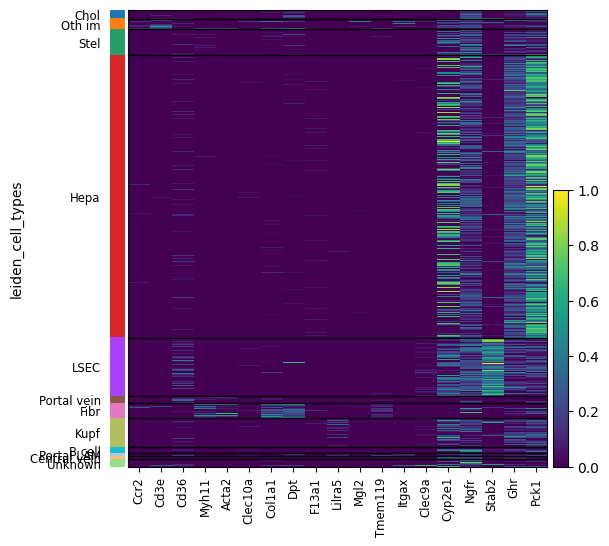

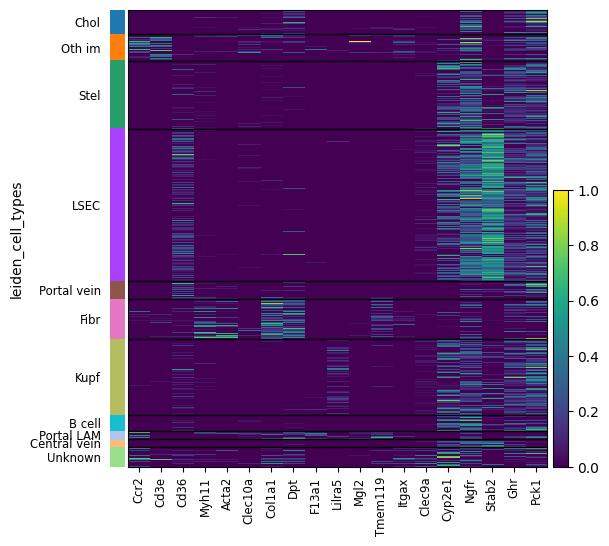

In [14]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,2,OUTPUT_DIR)

In [15]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
path_mg_mod_1_2 = OUTPUT_DIR + "/markerGeneListHL_othIm_endoSplit_portalLAM_modified_1_2.csv"
df_mg.to_csv(path_mg_mod_1_2)

Hepa             8.002
LSEC             9.333
Portal vein      8.000
Central vein    11.500
Chol             7.500
Kupf            17.000
Stel            15.501
Fibr            17.125
B cell           3.500
Meso             6.000
Portal LAM      19.500
Oth im           5.000
dtype: float64


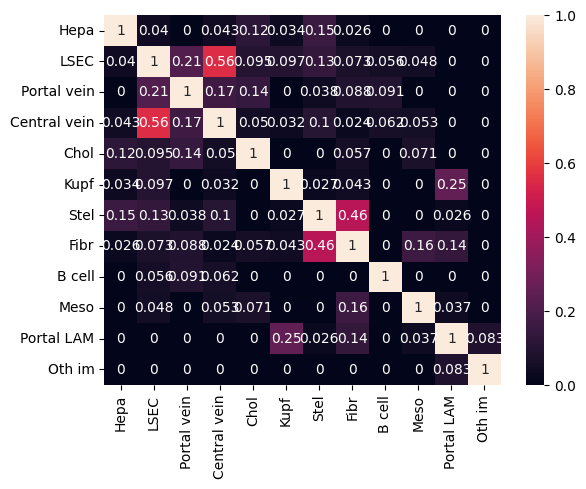

In [16]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

Hepa            63.314927
LSEC            12.744923
Stel             6.376915
Kupf             4.836124
Fibr             2.137513
Portal vein      2.101888
Chol             2.048450
Oth im           1.986106
Central vein     1.665479
B cell           1.398290
Portal LAM       0.944068
Meso             0.418596
Unknown          0.026719
Name: annotation_own_score_genes_strat_1_2, dtype: float64


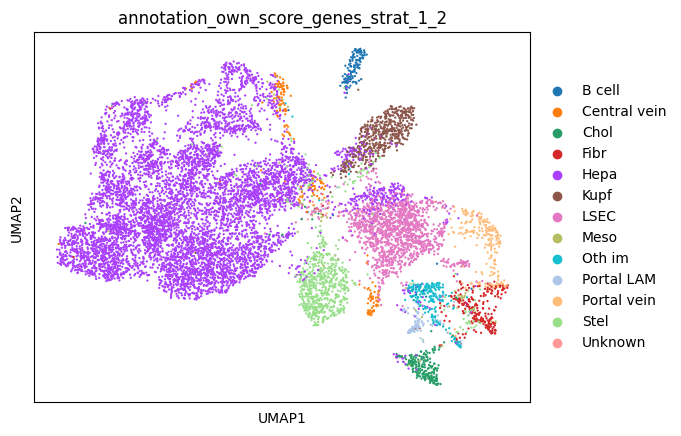

6.590666191663698


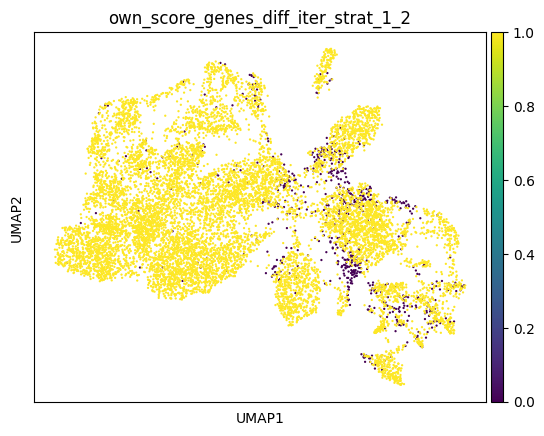

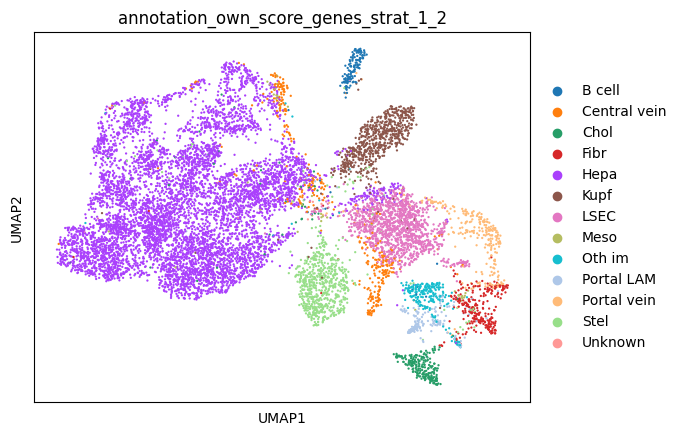

Hepa            0.604471
LSEC            0.116138
Kupf            0.060207
Stel            0.059494
Central vein    0.033844
Fibr            0.024670
Chol            0.024492
Portal vein     0.023156
Oth im          0.020752
Portal LAM      0.014606
B cell          0.013805
Meso            0.004097
Unknown         0.000267
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.730317064481653


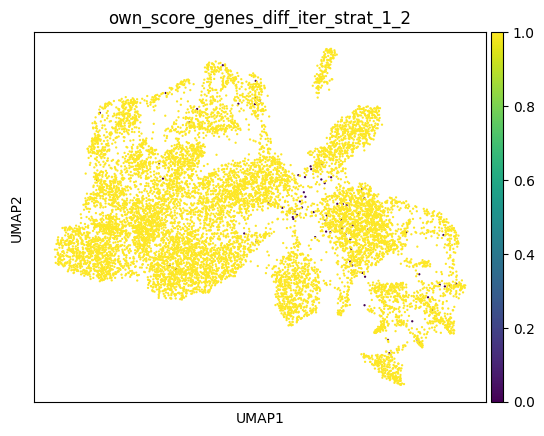

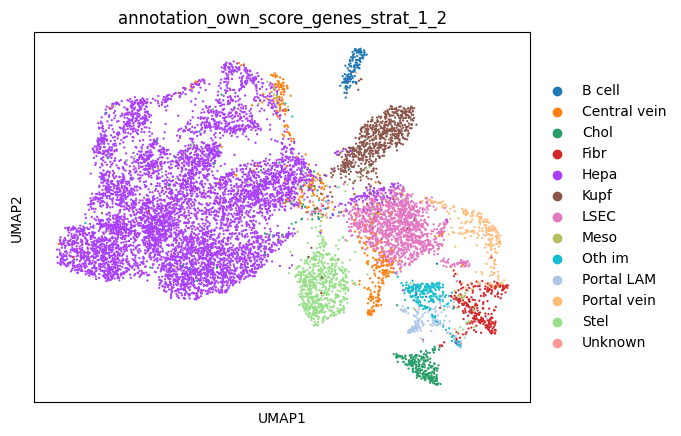

Hepa            0.602423
LSEC            0.113199
Kupf            0.061632
Stel            0.059316
Central vein    0.035447
Fibr            0.025205
Chol            0.025116
Portal vein     0.022800
Oth im          0.020752
Portal LAM      0.015408
B cell          0.013805
Meso            0.004631
Unknown         0.000267
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.13359458496615603


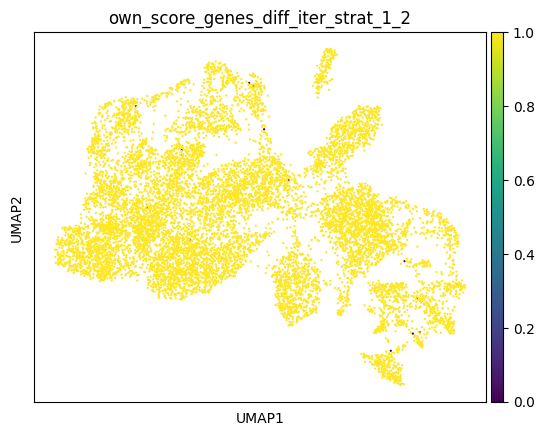

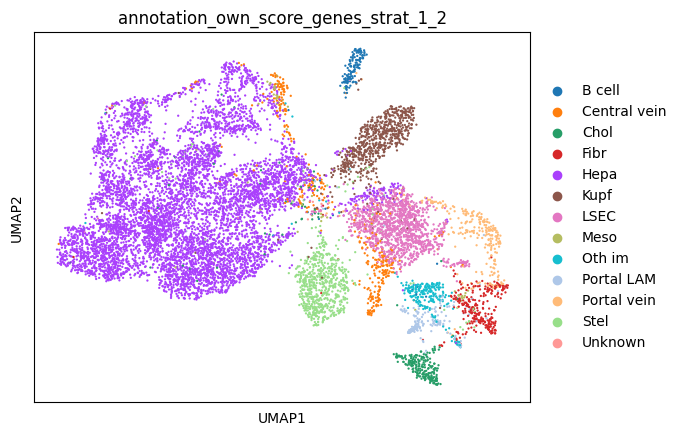

Hepa            0.601888
LSEC            0.112932
Kupf            0.061632
Stel            0.059494
Central vein    0.035269
Fibr            0.025472
Chol            0.025294
Portal vein     0.022711
Oth im          0.020663
Portal LAM      0.015586
B cell          0.013805
Meso            0.004988
Unknown         0.000267
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.062344139650872814


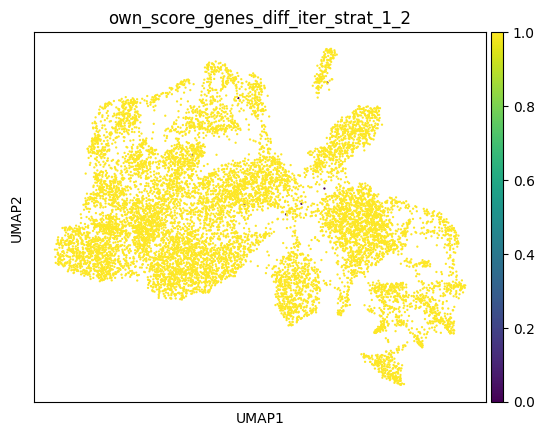

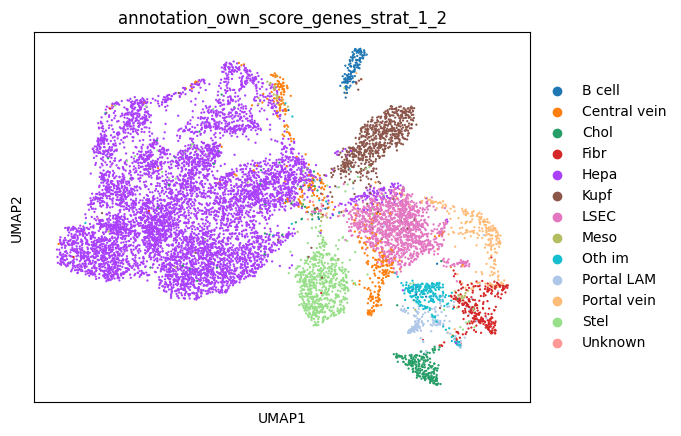

Hepa            0.601621
LSEC            0.112754
Kupf            0.061721
Stel            0.059494
Central vein    0.035269
Fibr            0.025472
Chol            0.025294
Portal vein     0.022711
Oth im          0.020663
Portal LAM      0.015675
B cell          0.013805
Meso            0.005255
Unknown         0.000267
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.008906305664410401


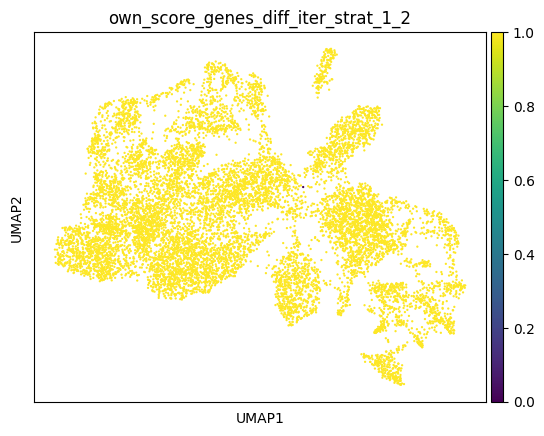

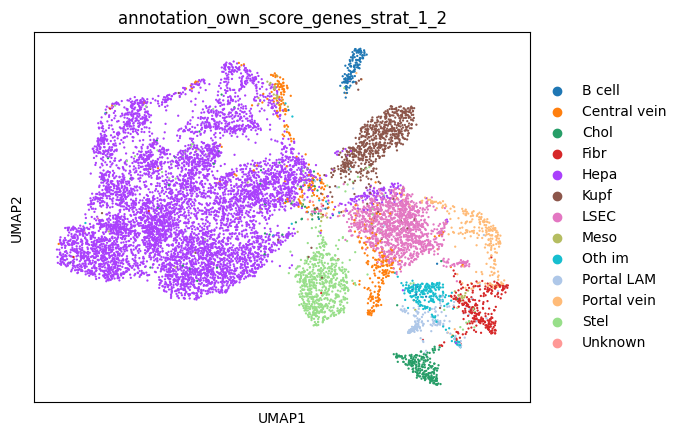

Hepa            0.601532
LSEC            0.112754
Kupf            0.061810
Stel            0.059494
Central vein    0.035269
Fibr            0.025472
Chol            0.025294
Portal vein     0.022711
Oth im          0.020663
Portal LAM      0.015675
B cell          0.013805
Meso            0.005255
Unknown         0.000267
Name: annotation_own_score_genes_strat_1_2, dtype: float64
converged


Hepa      LSEC  Portal vein  Central vein      Chol       Kupf  \
0      8.267770       NaN    -2.932873     -3.440352  1.496414  -4.584909   
1           NaN       NaN          NaN           NaN       NaN  18.737459   
2           NaN       NaN          NaN           NaN -1.978125  -4.392469   
3      0.826361       NaN          NaN     -3.182199       NaN        NaN   
4      2.047455 -3.246892          NaN     -2.909180 -1.092939        NaN   
...         ...       ...          ...           ...       ...        ...   
11223  3.755753 -2.771390          NaN     -3.714061  0.264457        NaN   
11224  8.214867 -2.953808          NaN     -1.755607  0.215165  -0.852603   
11225  4.353062       NaN          NaN           NaN  0.283852  -4.580202   
11226       NaN -0.222803          NaN     -3.503421       NaN  -1.091284   
11227  3.203114  0.064950    -2.403237     -0.046087 -1.247102  43.662420   

            Stel       Fibr   B cell       Meso  Portal LAM  Oth im  
0            NaN  -7.110683      NaN        NaN   -6.581694     NaN  
1            NaN   7.825166      NaN  14.168637   43.919486     NaN  
2            NaN   7.669077      NaN  19.954563   -2.517290     NaN  
3      -4.125033  -0.889447      NaN   5.193394   -5.883405     NaN  
4            NaN        NaN      NaN        NaN         NaN     NaN  
...          ...        ...      ...        ...         ...     ...  
11223        NaN        NaN      NaN        NaN   -7.899830     NaN  
11224  -1.447688        NaN      NaN        NaN   -2.849388     NaN  
11225        NaN        NaN      NaN        NaN   -6.048689     NaN  
11226  26.812925  14.366210      NaN        NaN   -6.635046     NaN  
11227  -1.910637  -4.028119 -1.41033  -1.477118   17.604009     NaN  

[11228 rows x 12 columns]

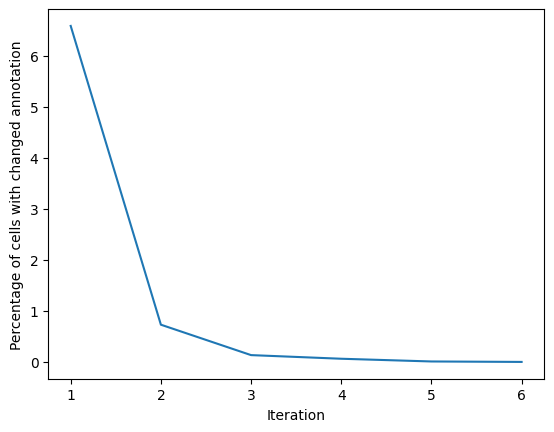

In [17]:
# Own score genes iterative with basic marker gene list updated with strategy 1 and 2
own_score_genes_iterative(sdata.table,path_mg_mod_1_2,nr_iterations=8,suffix='_strat_1_2',output_dir=OUTPUT_DIR)

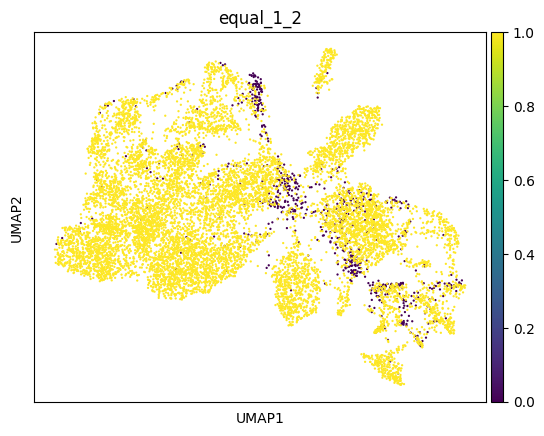

In [18]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

In [19]:
sdata.table.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize',
       'annotation_score_genes_25', 'cleanliness_score_genes_25',
       'score_celltype_own_score_genes',
       'second_score_celltype_own_score_genes', 'cleanliness_own_score_genes',
       'annotation_own_score_genes_start_iterative',
       'annotation_own_score_genes', 'count_density', 'leiden',
       'leiden_cell_types', 'score_celltype_own_score_genes_strat_1_2',
       'second_score_celltype_own_score_genes_strat_1_2',
       'cleanliness_own_score_genes_strat_1_2',
       'annotation_own_score_genes_start_iterative_strat_1_2',
       'annotation_own_score_genes_strat_1_2', 'equal_1_2'],
      dtype='object')

In [20]:
sdata.table.write_h5ad(OUTPUT_DIR+'/'+name_anndata+'_it_score_genes.h5ad')